In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# Cleaning Application.csv dataset


In [83]:
# Load application dataset
df_application = pd.read_csv('./application_data.csv')

### Dropping Columns Analysis

In [84]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# Print the information about the dataframe

df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [86]:
# Print the statistical summary of the dataframe

df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


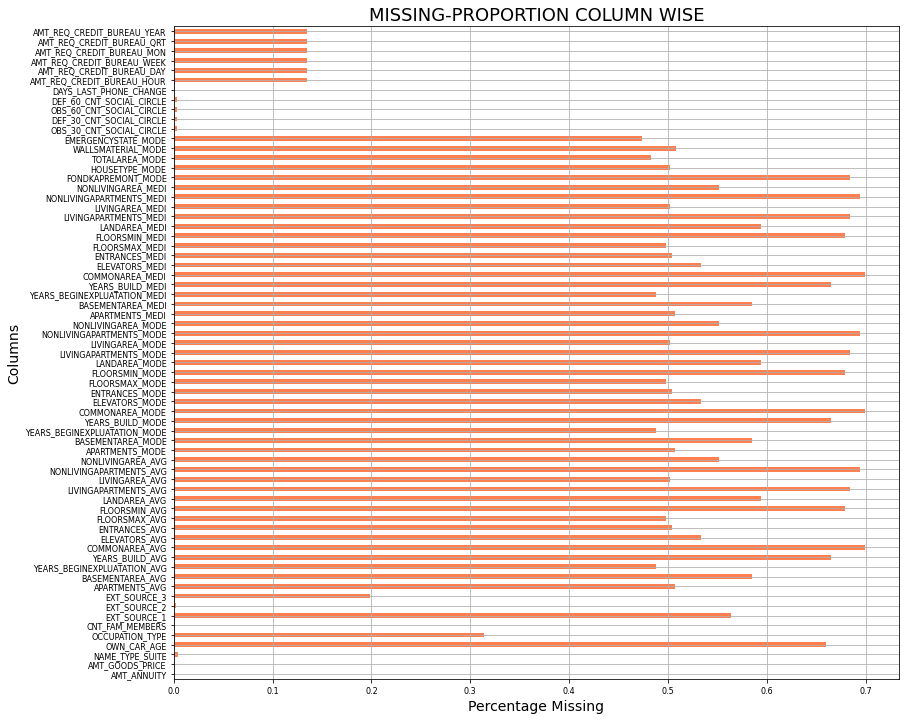

In [87]:
# Check which columns have na/null values.
# Percentage of the total values missing for each column in the application csv
# Plot a bar graph to represent missing values percent per column

per_missing = df_application.isna().sum(axis = 0)/df_application.shape[0]
ax = per_missing[~(per_missing==0)].plot(kind='barh', figsize=(13,12),
                                        color="coral", fontsize=8, grid=True)
ax.set_title("MISSING-PROPORTION COLUMN WISE", fontsize=18)
ax.set_xlabel("Percentage Missing", fontsize=14)
ax.set_ylabel("Columns", fontsize=14)
plt.show()


We see in some of the columns, the null values are above 0.5 which indicates more than 50 precent of the values are missing for those columns. Let's only see the columns which have missing values

We need to check whether the values are missing :
   * Completely at Random (MCAR)
   * Missing at Random(MAR)
   * Whether it is a Non-ignorable data

In [88]:
# Let's bucketize the mising values columns into 3 buckets
# missing values : 
# 0-25 %
# 25-50%
# 50% and above

# Check the columns with missing values above 50%

def missing_col_heat(df, miss_ser, bucket):
    
    r = random.random()
    b = random.random()
    g = random.random()
    corrMatrix = None
    list_cols = []
    if bucket == 0.5:
        list_cols = [index for index, _ in miss_ser[miss_ser >= 0.5].iteritems()]
    if bucket == 0.25:
        list_cols = [index for index, _ in miss_ser[(miss_ser >= 0.25) & (miss_ser < 0.50)].iteritems()]
    if bucket == 0:
        list_cols = [index for index, _ in miss_ser[(miss_ser > 0) & (miss_ser < 0.25)].iteritems()]
    
    if len(list_cols) > 0:
        plt.figure(figsize=(12,7))
        list_cols.append('TARGET')
        corrMatrix = df[list_cols].corr()['TARGET'][0:-1]
        ax = corrMatrix.plot(kind='barh', figsize=(10,7), color=(r,g,b), fontsize=8, grid=True)
        ax.set_title("TARGET - CORRELATION BAR PLOT", fontsize=18)
        ax.set_xlabel("Correlation Magnitude", fontsize=14)
        ax.set_ylabel("Columns", fontsize=14)
        plt.show()
        list_cols.remove('TARGET')
        print(f"Total number of Columns in the Data frame : {df.shape[1]}")
        print(f"Missing values columns in the bucket: {list_cols}")
    else:
        print("No columns found to be having missing values in the bucket")
    
    return corrMatrix, list_cols
    
    
    


### Correlation - Target variable with Columns missing more than 50% values 

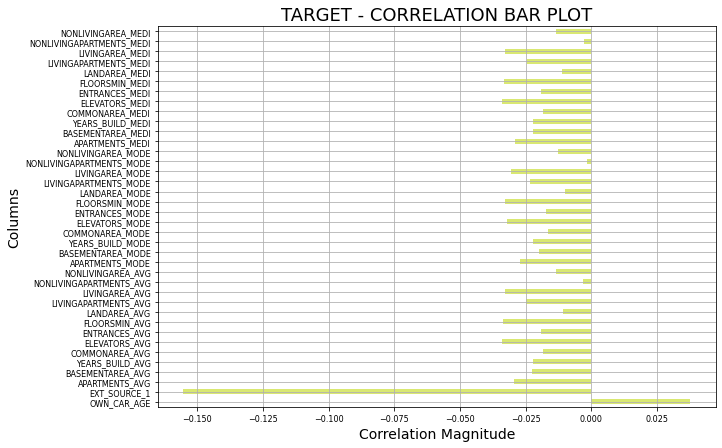

Total number of Columns in the Data frame : 122
Missing values columns in the bucket: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [89]:
corr_matrix_1, list_col_1 = missing_col_heat(df_application, per_missing, 0.5)

In [90]:
# Drop all the columns in the bucket(>50%)
df_application.drop(list_col_1, axis=1, inplace=True)
df_application.shape

(307511, 81)

In [91]:
# Impute the value for the EXT_SOURCE_1 and check the correlation value w.r.t the target variable again
# See if imputation brings drastic changes to the correlation

def impute_func(corr_matrix, df, cols):
    for col in cols:
        print(f"Baseline Correlation {col} : {corr_matrix[col]}")
        imp1 = df[col].fillna(df[col].mean()).corr(df['TARGET'])
        imp2 = df[col].fillna(df[col].median()).corr(df['TARGET'])
        imp3 = df[col].fillna(df[col].mode()).corr(df['TARGET'])

        print(f"Correlation - Values Imputed with mean : {imp1}")
        print(f"Correlation - Values Imputed with median : {imp2}")
        print(f"Correlation - Values Imputed with mode : {imp3}")
        print()
        



In [92]:
# Print the df info to check validate that drop has been successful
# Should be 81 columns after removing columns with low correlation w.r.t the target variable and high missing values.
len(list(df_application.notnull().sum(axis = 0)))

81

### Correlation - Target variable with Columns missing (25%-50%) values

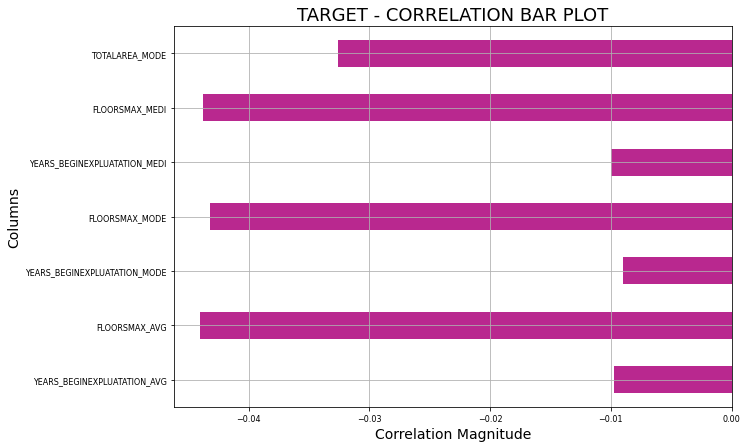

Total number of Columns in the Data frame : 81
Missing values columns in the bucket: ['OCCUPATION_TYPE', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE']


In [93]:
corr_matrix_2, list_col_2  = missing_col_heat(df_application, per_missing , 0.25)

In [94]:
# Drop the columns using list_col_2
df_application.drop(list_col_2, axis=1, inplace=True)

In [95]:
# Check the shape of the df_application after removal of the columns, not null columns
# Should be 81 - 9 = 72
len(list(df_application.notnull().sum(axis = 0)))

72

### Correlation - Target variable with Columns missing more than (0% - 25%) values

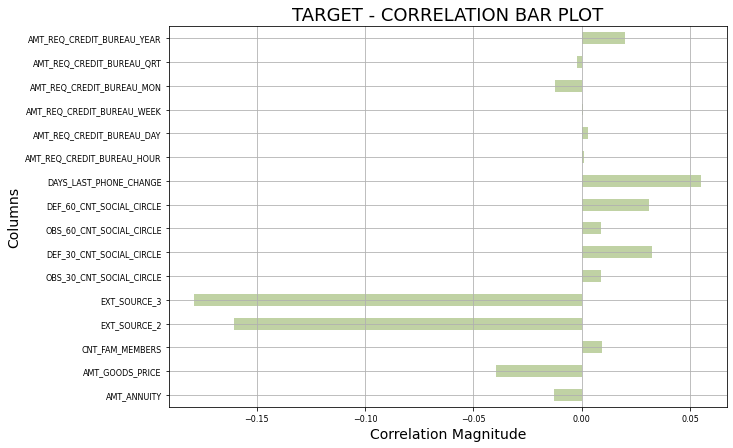

Total number of Columns in the Data frame : 72
Missing values columns in the bucket: ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [96]:
corr_matrix_3, list_col_3 = missing_col_heat(df_application, per_missing, 0)

For the 0-25% bucket we see that EXT_SOURCE_2, EXT_SOURCE_3 and DAYS_LAST_PHONE_CHANGE have a correlation greater than the threshold tolerance of 0.05.

The columns EXT_SOURCE 2 and 3 are variable which have been collected independently as per the columns description sheet, so can be considered the case of MCAR. 


The columns FLAG_CONT_MOBILE, FLAG_WORK_PHONE, FLAG_EMP_PHONE, FLAG_MOBIL, FLAG_PHONE are the columns related to phone info but none of the columns points to the fact that when the phone was number was last changed, so it would still be the completely missing at the random.

EXT_SOURCE_2, EXT_SOURCE_3 and DAYS_LAST_PHONE_CHANGE -> to be imputed for missing values.




In [97]:
# keep EXT_SOURCE_2, 3 and DAYS_LAST_PHONE_CHANGE columns and drop rest of the columns from list_col_3

_ = [list_col_3.remove(x) for x in ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE']]
df_application.drop(list_col_3, axis=1, inplace=True)

In [98]:
impute_func(corr_matrix_3, df_application, ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE'])

Baseline Correlation EXT_SOURCE_2 : -0.1604716716054463
Correlation - Values Imputed with mean : -0.16030315249684124
Correlation - Values Imputed with median : -0.16029475320996664
Correlation - Values Imputed with mode : -0.16047167160521014

Baseline Correlation EXT_SOURCE_3 : -0.17891869762805598
Correlation - Values Imputed with mean : -0.1573965926472951
Correlation - Values Imputed with median : -0.15589168562406433
Correlation - Values Imputed with mode : -0.17891869762837137

Baseline Correlation DAYS_LAST_PHONE_CHANGE : 0.0552184835135491
Correlation - Values Imputed with mean : 0.05521847562884967
Correlation - Values Imputed with median : 0.05521823012584448
Correlation - Values Imputed with mode : 0.055218483513459524



We observe w.r.t to the baseline the mode based imputed value keeps the correlation w.r.t the target variable intact.
Therefore, we impute the columns EXT_SOURCE_2, EXT_SOURCE_3 and DAYS_LAST_PHONE_CHANGE in mode.

In [99]:
# Imputing EXT_SOURCE_2 with mode
df_application['EXT_SOURCE_2'] = df_application['EXT_SOURCE_2'].fillna(df_application['EXT_SOURCE_2'].mode().values[0])

In [100]:
# Imputing EXT_SOURCE_3 with mode
df_application['EXT_SOURCE_3'] = df_application['EXT_SOURCE_3'].fillna(df_application['EXT_SOURCE_3'].mode().values[0])

In [101]:
# Imputing DAYS_LAST_PHONE_CHANGE with mode
df_application['DAYS_LAST_PHONE_CHANGE'].fillna(df_application['DAYS_LAST_PHONE_CHANGE'].mode().values[0], inplace=True)

In [102]:
# Check the shape of the df_application after removal of the columns, non null columns
# Should be 72 - 14 = 58 non null values columns
len(list(df_application.notnull().sum(axis = 0)))

58

### Type check for all the Columns

In [103]:
# Whethere the each of the element for each of the column has consistent data type w.r.t the defined datatype for the column.

list_n_datatype = [1 if (np.array_equal(df_application[f"{col}"], 
                   df_application[f"{col}"].astype(df_application[col].dtype))) else 0 
                   for col in df_application.columns]

# List stores [1, 0, ...] where 1 means the datatype matches for each of the element for the column 
# with defined datatype else 0

# Check if the sum of the list_n_datatype == len(list_n_datatype) -> all datatypes are consistent

if sum(list_n_datatype) == len(list_n_datatype):
    print('All datatypes are consistent with the values in the column')


All datatypes are consistent with the values in the column


### Data Imbalance Analysis

In [104]:
# Check the % distribution of each of the class in the target variable

print(f"The number of applicant with in [ALL OTHER CASES] category : {df_application['TARGET'].value_counts()[0]/df_application.shape[0]} ")
print(f"The number of applicant with in [PAYMENT DIFFICULTY] category : {df_application['TARGET'].value_counts()[1]/df_application.shape[0]} ")


The number of applicant with in [ALL OTHER CASES] category : 0.9192711805431351 
The number of applicant with in [PAYMENT DIFFICULTY] category : 0.08072881945686496 


In [105]:
ratio = (df_application['TARGET'].value_counts()[0]/df_application.shape[0])/(df_application['TARGET'].value_counts()[1]/df_application.shape[0])
print(f"The Imbalance ratio high : low = {ratio} : 1")

The Imbalance ratio high : low = 11.387150050352467 : 1


#### We see high skewness in the output class categories distribution, around only 8% of the applicants in the database faced difficulty in payment, while 92% cases are for the other class. 

In [106]:
# Segregate the columns into numerical and categorical

list_cols = set(df_application.columns)

numer_cols = set(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'])

categ_cols = list_cols - numer_cols
categ_cols = list(categ_cols - set(['SK_ID_CURR', 'TARGET']))

print(numer_cols)
print()
print(categ_cols)



{'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'AMT_CREDIT', 'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_3', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'EXT_SOURCE_2', 'DAYS_EMPLOYED'}

['NAME_INCOME_TYPE', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_17', 'CODE_GENDER', 'ORGANIZATION_TYPE', 'FLAG_CONT_MOBILE', 'NAME_HOUSING_TYPE', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_5', 'LIVE_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT', 'CNT_CHILDREN', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'REG_CITY_NOT_LIVE_CITY', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_9', 'FLAG_OWN_CAR', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMP_PHONE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_8', 'HOUR_APPR_PROCESS_START', 'FLAG_DOCUMENT_3', 'NAME_CONTRACT_TYPE', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_21', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_DOCUMENT_18', 'WE

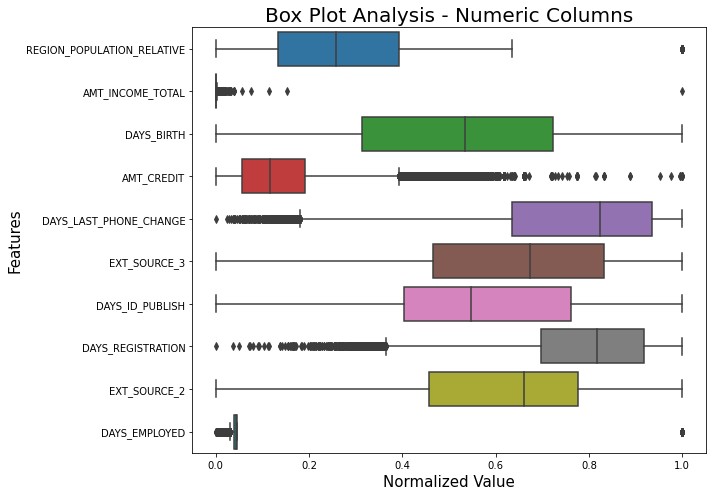

In [107]:
# Box plot for the numerical columns
# Normalize the numeric columns so that the values can be plotted on the same scale
plt.figure(figsize=(10,7))
min_max_scaler = preprocessing.MinMaxScaler()
df_numer = df_application[list(numer_cols)]
x_scaled = min_max_scaler.fit_transform(df_numer)
df_normalized = pd.DataFrame(x_scaled)
df_normalized.columns = list(numer_cols)
sns.boxplot(y="variable", x="value", data=pd.melt(df_normalized), orient='h')
plt.xlabel('Normalized Value', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Box Plot Analysis - Numeric Columns', fontsize=20)
plt.tight_layout()
plt.show()

#### The columns AMT_INCOME_TOTAL, DAYS_EMPLOYED need separate boxplots to understand the spread of the values in the column. Apart from that we can see outliers in the columns DAYS_LAST_PHONE_CHANGE, EXT_SOURCE_1, DAYS_REGISTRATION and AMT_CREDIT without any visual hindrance.


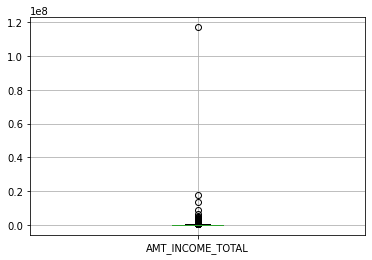

In [108]:
# Box plot AMT_INCOME_TOTAL
df_application.boxplot(column='AMT_INCOME_TOTAL')
plt.show()


In [109]:
# Inspecting the column to check if there is something wrong with the data points.
df_application['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

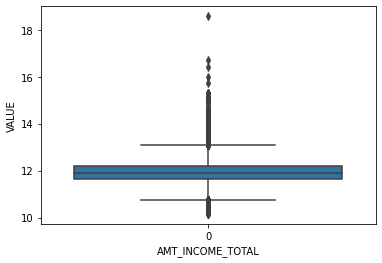

In [110]:
# Box plot with logrithmic scale

sns.boxplot(data=np.log(df_application['AMT_INCOME_TOTAL']))
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('VALUE')
plt.show()

#### The column has outlier on both the ends of the distrbution, but significant number of outliers can be found on the upper bound.

#### Nothing fishy to be found in the column.


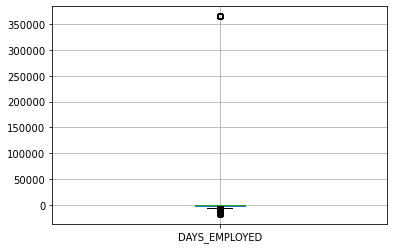

In [112]:
# Box plot DAYS_EMPLOYED
df_application.boxplot(column='DAYS_EMPLOYED')
plt.show()

In [113]:
# Inspecting the column to check if there is something wrong with the data points.
df_application['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [114]:
# Number of days before client started current employment cannot be negative.
print(df_application[df_application['DAYS_EMPLOYED'] < 0].shape[0]/df_application.shape[0])
print(df_application[df_application['DAYS_EMPLOYED'] > 0].shape[0]/df_application.shape[0])

0.8199218889730774
0.18007160719453938


#### We can safely drop the column since, we have 81% negative values for the column.

In [115]:
df_application.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)

In [116]:
# Rechecking the dataframe, it should be 57 columns now.

df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0


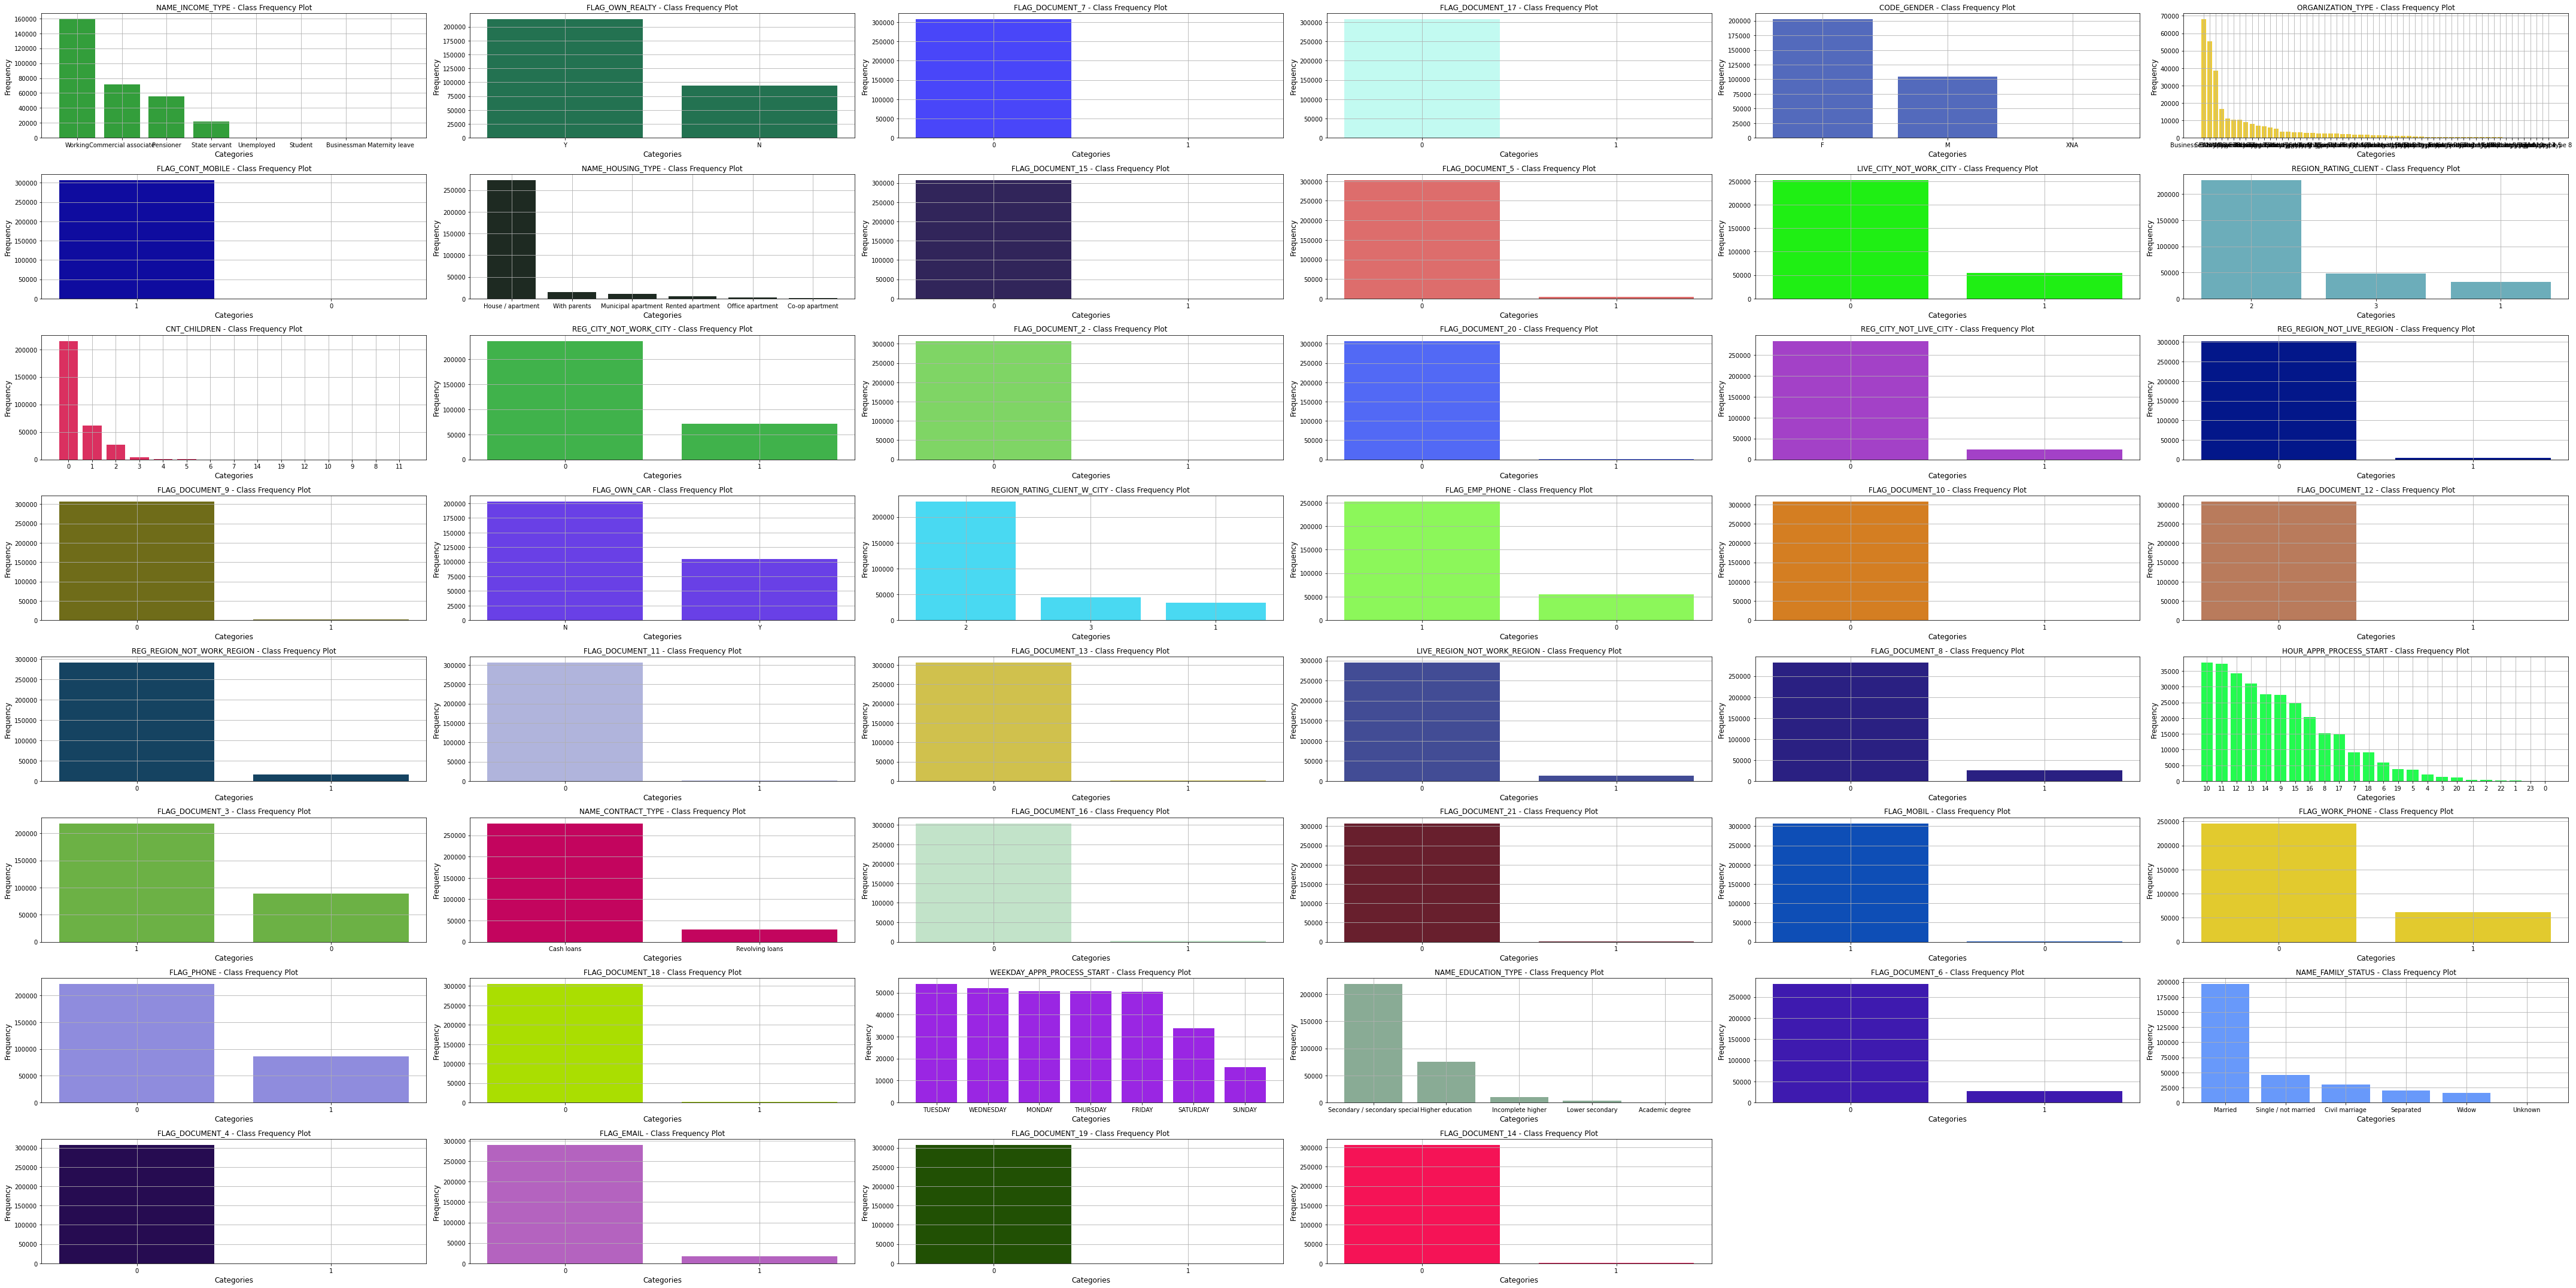

In [117]:
# Bar plot to have a visual view of the different variable and classes within them.
# Create a grid of subplots to visualize the class freqency for categorical variables.
# Set nrow and ncols depennding upon on the visual representation of the grid you want.
nrows=8
ncols=6
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(60,30))

index = 0
for row in range(nrows):
    for col in range(ncols):
        if index < len(categ_cols):
            r = random.random()
            b = random.random()
            g = random.random()
            y = [val for key, val in df_application[categ_cols[index]].value_counts().iteritems()]
            x = [n for n in range(len(y))]
            ax[row][col].bar(x, y, color=(r,g,b)) 
            #ax[row][col].set_xticks([key for key, val in df_application[categ_cols[index]].value_counts().iteritems()])
            ax[row][col].set_xlabel('Categories', fontsize=12)
            ax[row][col].set_ylabel('Frequency', fontsize=12)
            ax[row][col].set_title(f'{categ_cols[index]} - Class Frequency Plot')
            plt.sca(ax[row][col])
            plt.xticks(range(len(x)), [key for key, val in df_application[categ_cols[index]].value_counts().iteritems()],rotation=0)
            ax[row][col].grid()
        else :
            ax[row, col].axis('off')
        
        index +=1

plt.tight_layout()
plt.show()



#### The imbalance can be found across different categorical columns w.r.t the classes in the above plots.Out of the total 48 categorical columns, we find an imbalance for 37 columns. This means the dataset is highly skewed in terms of categorical variables

# Cleaning Previous.csv dataset


In [118]:
df_previous = pd.read_csv('./previous_application.csv')

In [119]:
# Checking the shape of the dataframe
df_previous.shape

(1670214, 37)

In [120]:
#Analysis the dataframe top 5 rows
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# Print the information about the dataframe

df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [122]:
# Finding the missing values percentgae in columns
df_previous.isnull().sum()/df_previous.shape[0] *100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

We can see that two columns RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED has more than 99 percent missing values hence can be directly dropped from the dataframe.

In [123]:
df_previous.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1, inplace=True)

We can see that the percentage of missing values in the columns AMT_CREDIT and PRODUCT_COMBINATION is very less. Lets look the missing values in them individually

In [124]:
#Checking nulls in both the columns
df_previous[['AMT_CREDIT','PRODUCT_COMBINATION']].isnull().sum()

AMT_CREDIT               1
PRODUCT_COMBINATION    346
dtype: int64

Since the values in these columns missing are negligible , hence we can impute these values with the mode

In [125]:
df_previous['AMT_CREDIT']=df_previous['AMT_CREDIT'].fillna(df_previous['AMT_CREDIT'].mode().values[0])
df_previous['PRODUCT_COMBINATION']=df_previous['PRODUCT_COMBINATION'].fillna(df_previous['PRODUCT_COMBINATION'].mode().values[0])

In [126]:
#Rechecking nulls in both the columns
df_previous[['AMT_CREDIT','PRODUCT_COMBINATION']].isnull().sum()

AMT_CREDIT             0
PRODUCT_COMBINATION    0
dtype: int64

In [127]:
#Rechecking the shape of the dataframe
print(df_previous.shape)
df_previous.head()

(1670214, 35)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Let us create a column which depicts if the previous application of the applicants fall under which category, if they were approved , refused, cancelled or unused i.e. on the basis of the column NAME_CONTRACT_STATUS and then we will find the correlation of this with the columns that has missing values more than 30%. This way will help us to find out if the column is needed to be imputed for further analysis or the it can be dropped off the dataframe

In [128]:
# Create dictionary for categories in NAME_CONTRACT_STATUS with numeric value
dict_label = dict(zip([x for x in df_previous['NAME_CONTRACT_STATUS'].unique()], [x for x in range(len(df_previous['NAME_CONTRACT_STATUS'].unique()))]))
print(dict_label)


{'Approved': 0, 'Refused': 1, 'Canceled': 2, 'Unused offer': 3}


In [129]:
df_previous["TARGET"]=[dict_label[x] for x in df_previous['NAME_CONTRACT_STATUS']]

In [130]:
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,1


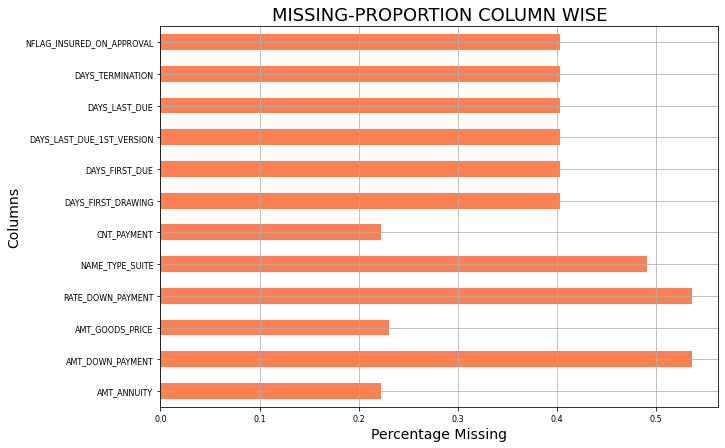

In [131]:
# Check which  other columns have na/null values by Plotting a bar graph to represent missing values percent per column

per_missing = df_previous.isna().sum(axis = 0)/df_previous.shape[0]
ax = per_missing[~(per_missing==0)].plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=8, grid=True)
ax.set_title("MISSING-PROPORTION COLUMN WISE", fontsize=18)
ax.set_xlabel("Percentage Missing", fontsize=14)
ax.set_ylabel("Columns", fontsize=14)
plt.show()

Lets check the correlation of other columns that has missing values and then decide whether we drop or impute the columns

## Correlation - Target variable with Columns missing more than 50% values

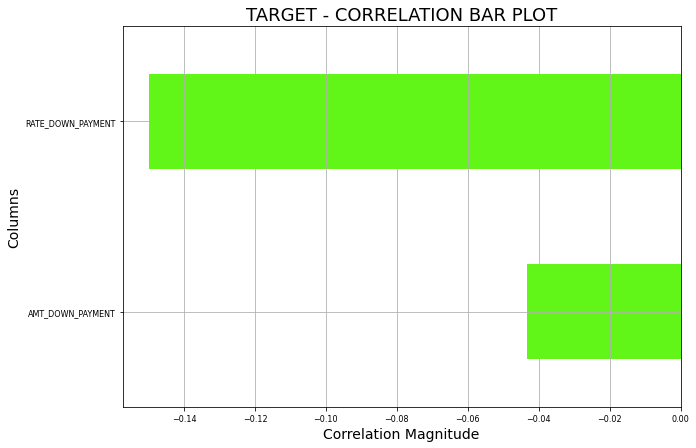

Total number of Columns in the Data frame : 36
Missing values columns in the bucket: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']


In [132]:
corr_matrix_pre1, list_col_pre1 = missing_col_heat(df_previous, per_missing, 0.5)

In [133]:
# Dropping the columns in bucket above 50 percent since the correlation is not significant with respect to the pseudo target variable
df_previous.drop(list_col_pre1,axis=1, inplace=True)

## Correlation - Target variable with Columns missing (25%-50%) values

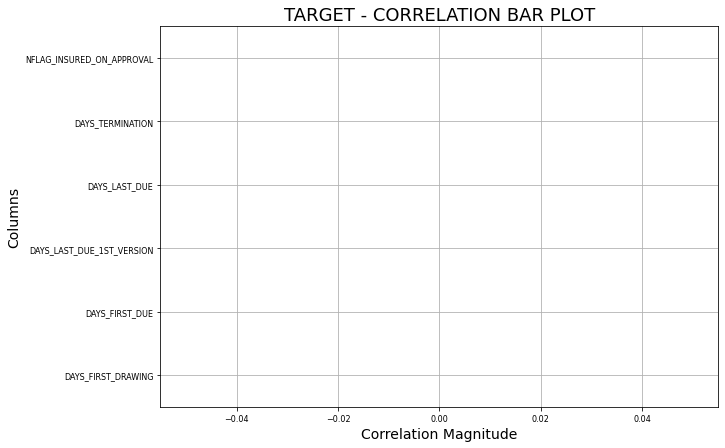

Total number of Columns in the Data frame : 34
Missing values columns in the bucket: ['NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
DAYS_FIRST_DRAWING          NaN
DAYS_FIRST_DUE              NaN
DAYS_LAST_DUE_1ST_VERSION   NaN
DAYS_LAST_DUE               NaN
DAYS_TERMINATION            NaN
NFLAG_INSURED_ON_APPROVAL   NaN
Name: TARGET, dtype: float64


In [134]:
corr_matrix_pre2, list_col_pre2  = missing_col_heat(df_previous, per_missing, 0.25)
print(corr_matrix_pre2)

In [135]:
# Correlation as NAN, makes us suspect the columns 
# Explore the columns for negative and null values
# Checking for the numeric columsn exlucding the column NAME_TYPE_SUITE


for col in list_col_pre2:
    if df_previous[col].dtype != 'O':
        print(f"Column : {col}")
        print(f'Check Negative Values (% of total) : {((sum(1 if x < 0 else 0 for x in df_previous[col]))/df_previous[col].shape[0])*100} ')
        print(f'Check Nulls/Nan in the Column (% of total): {(df_previous[col].isnull().sum()/df_previous[col].shape[0])*100}')
    else:
        print(f"Column : {col}")
        print(f'Check Nulls/Nan in the Column (% of total): {(df_previous[col].isnull().sum()/df_previous[col].shape[0])*100}')
              

Column : NAME_TYPE_SUITE
Check Nulls/Nan in the Column (% of total): 49.11975351661524
Column : DAYS_FIRST_DRAWING
Check Negative Values (% of total) : 3.7543093280262294 
Check Nulls/Nan in the Column (% of total): 40.29812946125467
Column : DAYS_FIRST_DUE
Check Negative Values (% of total) : 57.268350043766844 
Check Nulls/Nan in the Column (% of total): 40.29812946125467
Column : DAYS_LAST_DUE_1ST_VERSION
Check Negative Values (% of total) : 40.60485662316326 
Check Nulls/Nan in the Column (% of total): 40.29812946125467
Column : DAYS_LAST_DUE
Check Negative Values (% of total) : 47.05552701629851 
Check Nulls/Nan in the Column (% of total): 40.29812946125467
Column : DAYS_TERMINATION
Check Negative Values (% of total) : 46.17587925858603 
Check Nulls/Nan in the Column (% of total): 40.29812946125467
Column : NFLAG_INSURED_ON_APPROVAL
Check Negative Values (% of total) : 0.0 
Check Nulls/Nan in the Column (% of total): 40.29812946125467


#### We see above columns have a significant number of negative and null values as a proportion. Therefore dropping these columns is a safe bet.

In [136]:
# Dropping all the columns from the list_col_pre2
df_previous.drop(list_col_pre2, axis=1, inplace=True)

### Correlation - Target variable with Columns missing more than (0% - 25%) values

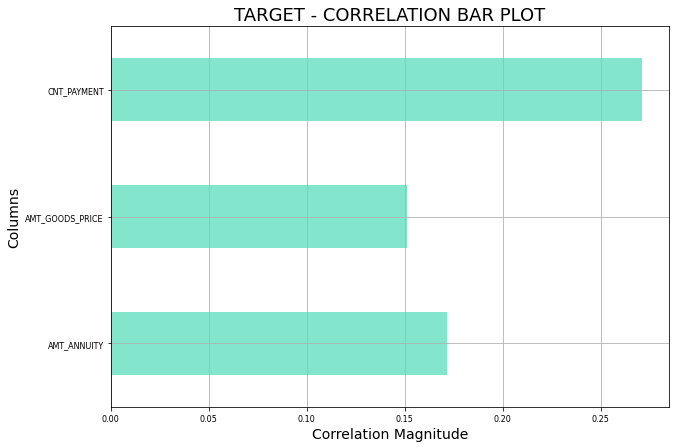

Total number of Columns in the Data frame : 27
Missing values columns in the bucket: ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']


In [137]:
corr_matrix_pre3, list_col_pre3 = missing_col_heat(df_previous, per_missing, 0)

we found that for the bucket under 25%, we have all three features- AMT_ANNUITY, AMT_GOODS_PRICE And CNT_PAYMENT having higher than -0.05 correlation . Since we have a tolerance threshold of +-0.05. we will not drop this columns and try to impute the values

In [138]:
impute_func(corr_matrix_pre3, df_previous,['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_PAYMENT'])

Baseline Correlation AMT_ANNUITY : 0.17129521518970603
Correlation - Values Imputed with mean : 0.07724465259992971
Correlation - Values Imputed with median : -0.051563923716766324
Correlation - Values Imputed with mode : 0.17129521519047203

Baseline Correlation AMT_GOODS_PRICE : 0.15088237559197418
Correlation - Values Imputed with mean : 0.09132548750395657
Correlation - Values Imputed with median : -0.03157190193061905
Correlation - Values Imputed with mode : 0.15088237559269674

Baseline Correlation CNT_PAYMENT : 0.2710217180236018
Correlation - Values Imputed with mean : 0.12221598253126577
Correlation - Values Imputed with median : 0.009009713062448126
Correlation - Values Imputed with mode : 0.2710217180229288



We observe w.r.t to the baseline the mode based imputed value keeps the correlation w.r.t the target variable intact.
Therefore, we impute the columns AMT_ANNUITY , AMT_GOODS_PRICE and CNT_PAYMENT in mode.

In [139]:
# Imputing AMT_ANNUITY,  AMT_GOODS_PRICE, CNT_PAYMENT with mode
df_previous['AMT_ANNUITY'] = df_previous['AMT_ANNUITY'].fillna(df_previous['AMT_ANNUITY'].mode().values[0])
df_previous['AMT_GOODS_PRICE'] = df_previous['AMT_GOODS_PRICE'].fillna(df_previous['AMT_ANNUITY'].mode().values[0])
df_previous['CNT_PAYMENT'] = df_previous['CNT_PAYMENT'].fillna(df_previous['CNT_PAYMENT'].mode().values[0])

# Dropping the Target created as it was needed for finding the correlation
df_previous.drop(['TARGET'],axis=1, inplace=True)

In [140]:
df_previous.shape # no of columns should be 37-11= 26

(1670214, 26)

In [141]:
# Rechecking the missing values
df_previous.isnull().sum()/df_previous.shape[0] *100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

In [142]:
df_previous['NAME_CONTRACT_STATUS'].value_counts('Approved')

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

### Type check for all the Columns

In [143]:
# Whethere the each of the element for each of the column has consistent data type w.r.t the defined datatype for the column.

list_n_datatype = [1 if (np.array_equal(df_previous[f"{col}"], 
                   df_previous[f"{col}"].astype(df_previous[col].dtype))) else 0 
                   for col in df_previous.columns]

# List stores [1, 0, ...] where 1 means the datatype matches for each of the element for the column 
# with defined datatype else 0

# Check if the sum of the list_n_datatype == len(list_n_datatype) -> all datatypes are consistent

if sum(list_n_datatype) == len(list_n_datatype):
    print('All datatypes are consistent with the values in the column')

All datatypes are consistent with the values in the column


### Data Imbalance Analysis

In [144]:
# Check the % distribution of each of the class in the target variable

print(f"The number of applicants  with Approved Loan : {df_previous['NAME_CONTRACT_STATUS'].value_counts()['Approved']/df_previous.shape[0]} ")
print(f"The number of applicants with Refused Loan : {df_previous['NAME_CONTRACT_STATUS'].value_counts()['Refused']/df_previous.shape[0]} ")
print(f"The number of applicants Cancelled Loan : {df_previous['NAME_CONTRACT_STATUS'].value_counts()['Canceled']/df_previous.shape[0]} ")
print(f"The number of applicants with Unused Offers : {df_previous['NAME_CONTRACT_STATUS'].value_counts()['Unused offer']/df_previous.shape[0]} ")

The number of applicants  with Approved Loan : 0.6207474012312195 
The number of applicants with Refused Loan : 0.17403638096675036 
The number of applicants Cancelled Loan : 0.1893883059296593 
The number of applicants with Unused Offers : 0.015827911872370846 


In [145]:
ratio = (df_previous['NAME_CONTRACT_STATUS'].value_counts()['Approved'])/((df_previous['NAME_CONTRACT_STATUS'].value_counts()['Refused'])+(df_previous['NAME_CONTRACT_STATUS'].value_counts()['Canceled'])+(df_previous['NAME_CONTRACT_STATUS'].value_counts()['Unused offer']))
print(f"The Imbalance ratio high : low = {ratio} : 1")

The Imbalance ratio high : low = 1.6367650564463803 : 1


62 percent of the loans were approved in the previous applications and others status combined were where the offer was either refused or canceled or unused are around 38 percent 

In [146]:
# Segregating all the columns from previous applications dataframe into numerical and categorical


all_columns=set(df_previous.columns.tolist())
#print(all_columns, len(all_columns))

categorical_columns = set(df_previous.select_dtypes(["object"]).columns.tolist())
#print(categorical_columns, len(categorical_columns))

numerical_columns=all_columns-categorical_columns
#print(numerical_columns, len(numerical_columns))
numerical_columns.remove('SK_ID_CURR')
numerical_columns.remove('SK_ID_PREV')

print('Categorical Columns are:')
print(categorical_columns)
print('Numerical Columns are:')
print(numerical_columns)

Categorical Columns are:
{'NAME_CONTRACT_TYPE', 'NAME_YIELD_GROUP', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'CODE_REJECT_REASON', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PRODUCT_TYPE', 'NAME_PAYMENT_TYPE', 'PRODUCT_COMBINATION', 'NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_PORTFOLIO'}
Numerical Columns are:
{'CNT_PAYMENT', 'SELLERPLACE_AREA', 'DAYS_DECISION', 'NFLAG_LAST_APPL_IN_DAY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'AMT_APPLICATION', 'AMT_ANNUITY'}


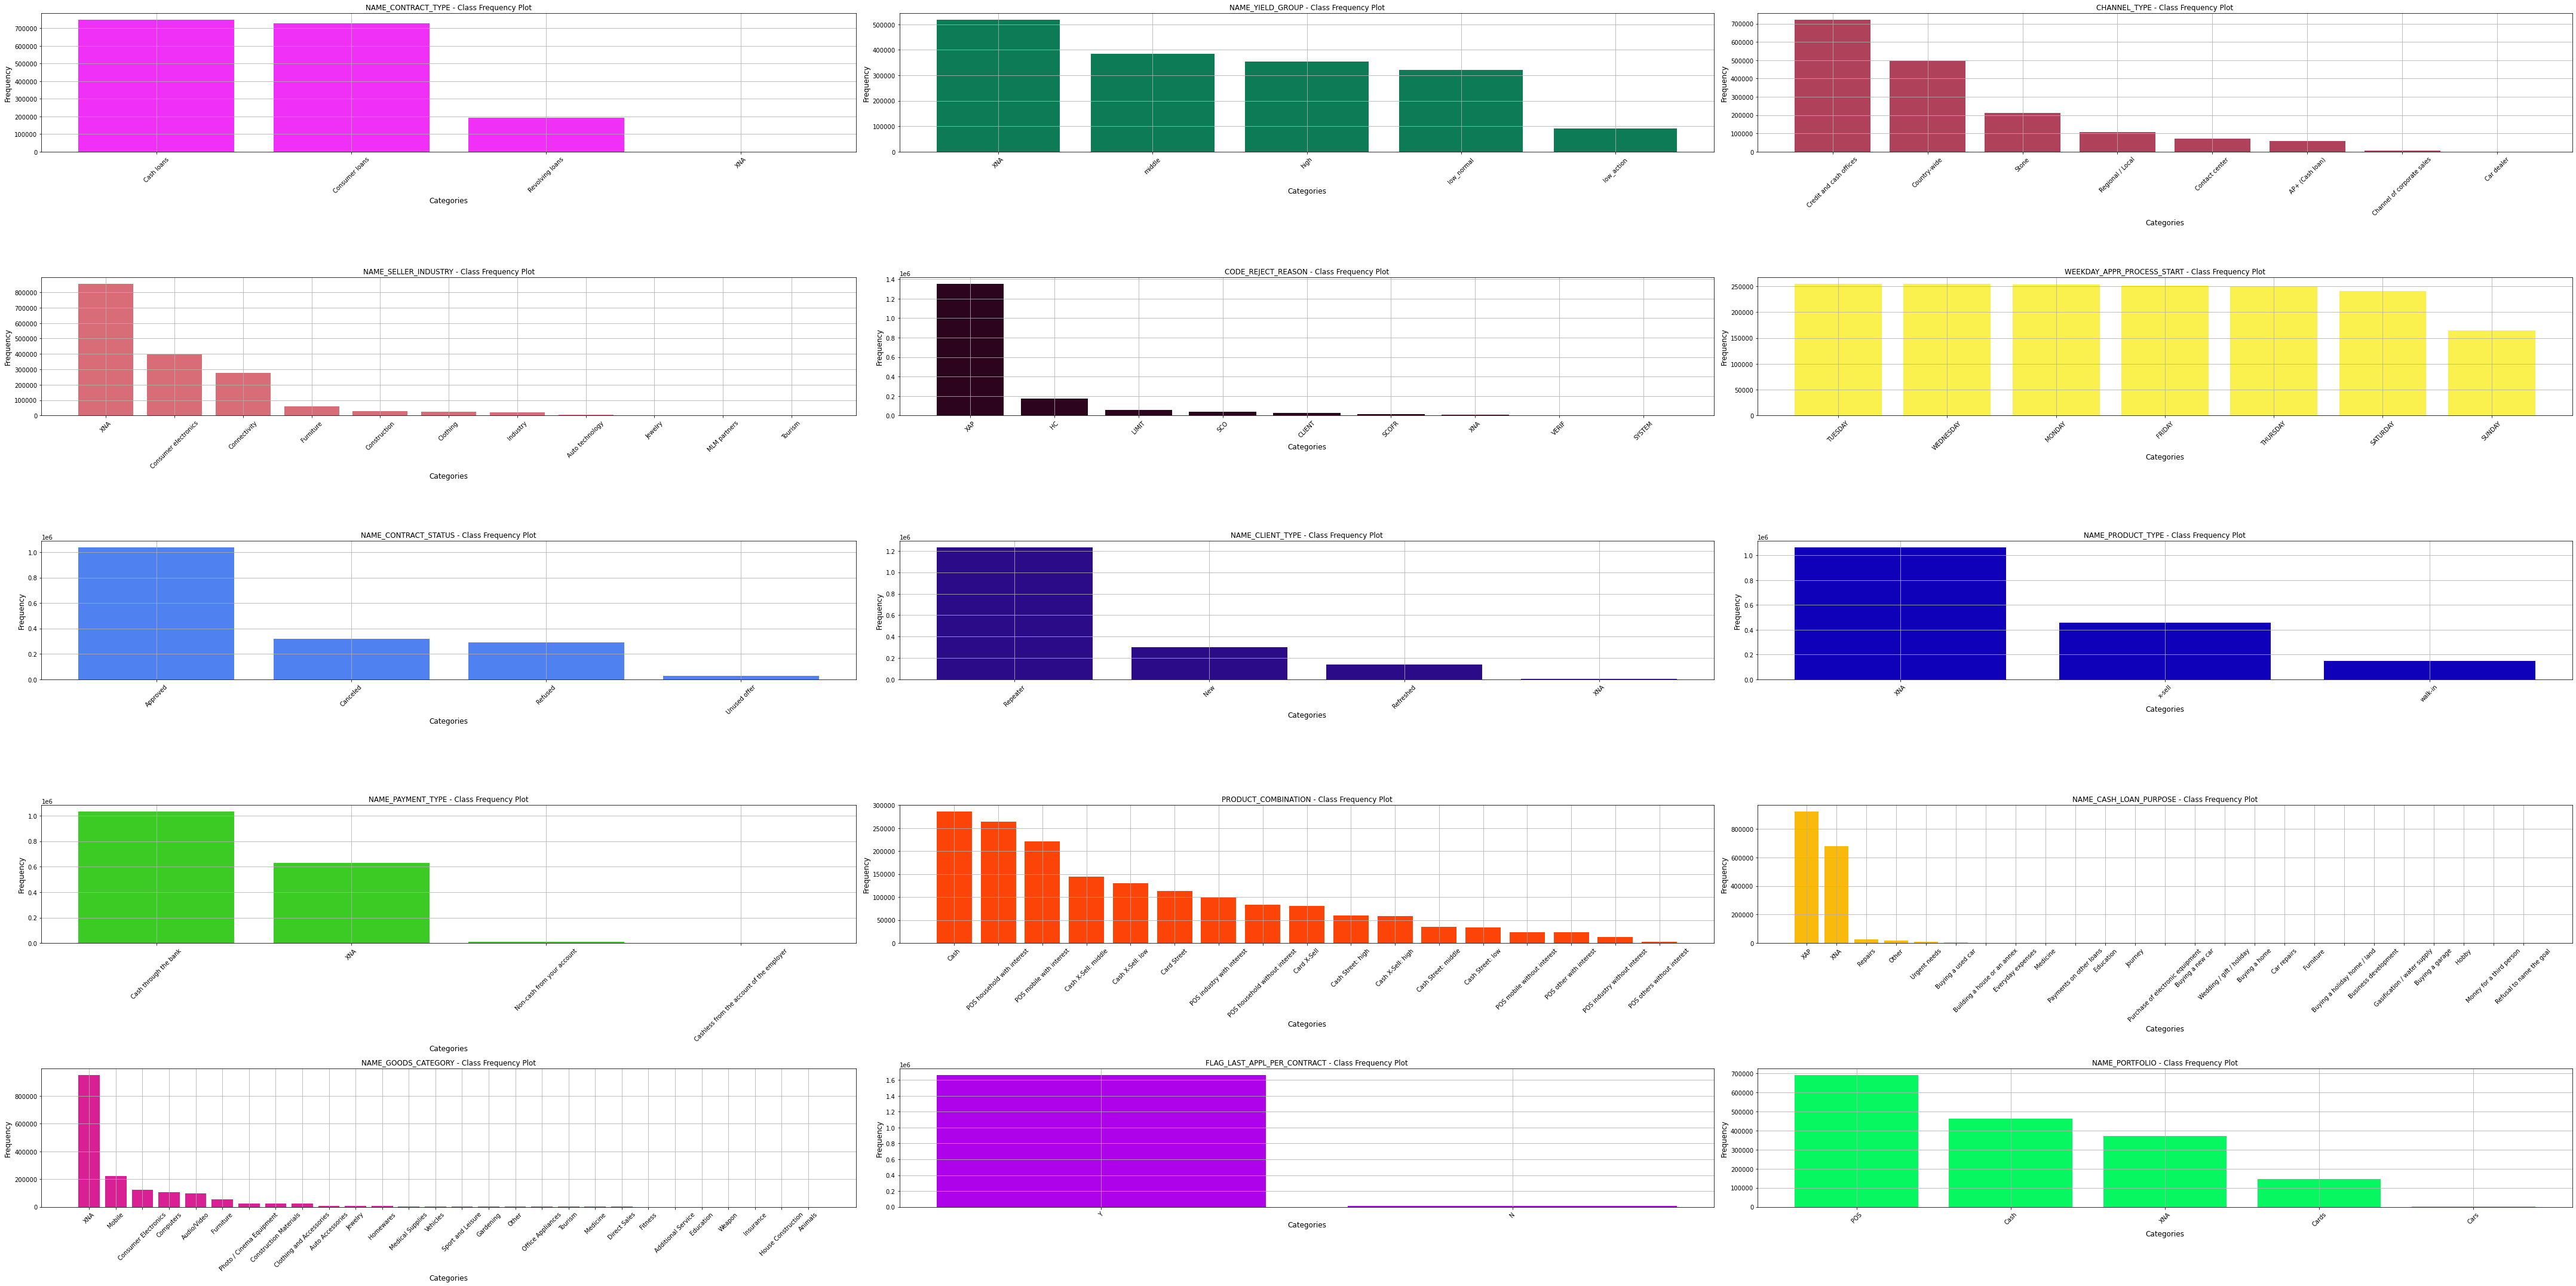

In [147]:
# Bar plot to have a visual view of the different variable and classes within them.
# Create a grid of subplots to visualize the class freqency for categorical variables.
# Set nrow and ncols depennding upon on the visual representation of the grid you want.
nrows=5
ncols=3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(60,30))
categ_cols=list(categorical_columns)
index = 0
for row in range(nrows):
    for col in range(ncols):
        if index < len(categ_cols):
            r = random.random()
            b = random.random()
            g = random.random()
            y = [val for key, val in df_previous[categ_cols[index]].value_counts().iteritems()]
            x = [n for n in range(len(y))]
            ax[row][col].bar(x, y, color=(r,g,b)) 
            #ax[row][col].set_xticks([key for key, val in df_application[categ_cols[index]].value_counts().iteritems()])
            ax[row][col].set_xlabel('Categories', fontsize=12)
            ax[row][col].set_ylabel('Frequency', fontsize=12)
            ax[row][col].set_title(f'{categ_cols[index]} - Class Frequency Plot')
            plt.sca(ax[row][col])
            plt.xticks(range(len(x)), [key for key, val in df_previous[categ_cols[index]].value_counts().iteritems()],rotation=45)
            ax[row][col].grid()
        else :
            ax[row, col].axis('off')
        
        index +=1

plt.tight_layout()
plt.show()


We can understand the following from the above feature graphs.
* Most of the loan applications from the previous application were approved and a very few were the usued offers.
* Majority of the CODE_REJECT_REASON falls under the category XAP(not available data)
* From the NAME_PORTFOLIO class plot we can say that the majority of the Previous applications were for POS- (COnsumer Loans)
* Majority of the applicants that applied for loans previously chose to pay via "Cash Through Bank" as Payemnt Type
* Majority of the previous applicants were already a repeated customer , followed by the new customers.

## Plotting the box plot for numerical columns

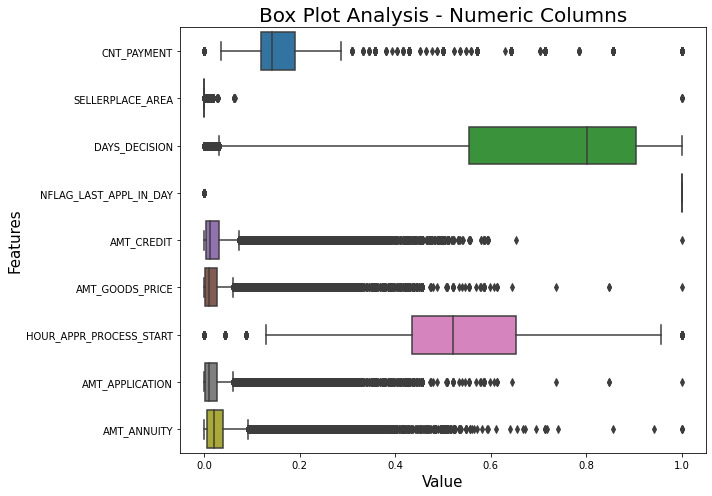

In [148]:
# Normalize the numeric columns so that the values can be plotted on the same scale
plt.figure(figsize=(10,7))
min_max_scaler = preprocessing.MinMaxScaler()
df_numerical = df_previous[list(numerical_columns)]
x_scaled = min_max_scaler.fit_transform(df_numerical)
df_normalized = pd.DataFrame(x_scaled)
df_normalized.columns = list(numerical_columns)
sns.boxplot(y="variable", x="value", data=pd.melt(df_normalized), orient='h')
plt.xlabel('Value', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Box Plot Analysis - Numeric Columns', fontsize=20)
plt.tight_layout()
plt.show()

There are visual outliers in AMT_ANNUITY, HOUR_APR_PROCESS_START, DAYS_DECISION,AMT_CREDIT,AMT_GOODS_PRICE, AMT_APPLICATION,CNT_PAYMENT columns.

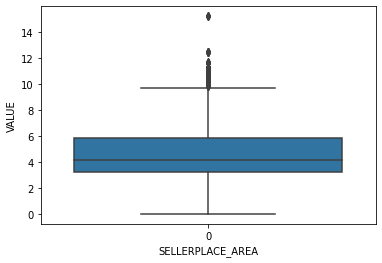

In [149]:
# Box plot SELLERPLACE_AREA
sns.boxplot(data=np.log(df_previous['SELLERPLACE_AREA']))
plt.xlabel('SELLERPLACE_AREA')
plt.ylabel('VALUE')
plt.show()

#### The distrbution of the column shows that it has outliers in the upper bound.

# Merging the datasets


In [150]:
# Merge the two dataset together 
print(df_application.shape[0])
print(df_previous.shape[0])

307511
1670214


In [151]:
# Check if all the SK_ID_CURR are unique
# if each ID's count is 1, then the sum should come out to be df_application.shape[0]
len(list(df_application['SK_ID_CURR'].unique())) == df_application.shape[0]

True

In [152]:
# Check if all the SK_ID_CURR are unique
# if each ID's count is 1, then the sum should come out to be df_previous.shape[0]
len(list(df_previous['SK_ID_CURR'].unique())) == df_previous.shape[0]

False

In [153]:
# Check if all the SK_ID_PREV are unique
len(list(df_previous['SK_ID_PREV'].unique())) == df_previous.shape[0]

True

In [154]:
# Check the number of df_application SK_ID_CURR which are not part of the SK_ID_CURR in df_previous

len(set(df_application['SK_ID_CURR'].unique()) - set(df_previous['SK_ID_CURR'].unique()))

16454

In [155]:
'''
Above statement tells that SK_ID_CURR have duplicates in the previou.csv means and there is Many to one mapping for
SK_ID_PREV and SK_ID_CURR.
We need to consider only the SK_ID_CURR in the application for the join. But there can be multiple previous SK_ID_PREV
mapped to SK_ID_CURR

'''

# We will perform a left join with df_application -Left and df_previous - right on SK_ID_CURR

df_merged = pd.merge(df_application, df_previous, on='SK_ID_CURR', how='left', suffixes=('_APP', '_PREV'))

In [156]:
df_merged.shape

(1430155, 82)

In [157]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 82 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   SK_ID_CURR                       1430155 non-null  int64  
 1   TARGET                           1430155 non-null  int64  
 2   NAME_CONTRACT_TYPE_APP           1430155 non-null  object 
 3   CODE_GENDER                      1430155 non-null  object 
 4   FLAG_OWN_CAR                     1430155 non-null  object 
 5   FLAG_OWN_REALTY                  1430155 non-null  object 
 6   CNT_CHILDREN                     1430155 non-null  int64  
 7   AMT_INCOME_TOTAL                 1430155 non-null  float64
 8   AMT_CREDIT_APP                   1430155 non-null  float64
 9   NAME_INCOME_TYPE                 1430155 non-null  object 
 10  NAME_EDUCATION_TYPE              1430155 non-null  object 
 11  NAME_FAMILY_STATUS               1430155 non-null 

#### After join, the columns from the previous.csv which don't have a matching SK_ID_CURR in the application seems to have null values. We can drop those datapoints which don't have a matching SK_ID_CURR in previous.csv since there is no historic record of the loans of those applicant and it doesn't help us in our analysis due to the missing previous loan attributes.


In [158]:
df_merged.dropna(inplace=True)

In [159]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1430154
Data columns (total 82 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   SK_ID_CURR                       1413701 non-null  int64  
 1   TARGET                           1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_APP           1413701 non-null  object 
 3   CODE_GENDER                      1413701 non-null  object 
 4   FLAG_OWN_CAR                     1413701 non-null  object 
 5   FLAG_OWN_REALTY                  1413701 non-null  object 
 6   CNT_CHILDREN                     1413701 non-null  int64  
 7   AMT_INCOME_TOTAL                 1413701 non-null  float64
 8   AMT_CREDIT_APP                   1413701 non-null  float64
 9   NAME_INCOME_TYPE                 1413701 non-null  object 
 10  NAME_EDUCATION_TYPE              1413701 non-null  object 
 11  NAME_FAMILY_STATUS               1413701 non-null 

In [160]:
# Above info show no null records in the merged dataframes.
df_merged.shape

(1413701, 82)

In [161]:
df_merged.to_csv('cleaned_merged_data.csv', index=False)
print('Saved the cleaned_merged_data to the local storage')

Saved the cleaned_merged_data to the local storage
